In [1]:
import sys

import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sys.path.extend(["../../../"])
from src.para_voro import *
from src.general_util import *
from src.para_voro_plots import *

In [2]:
colors = make_object_array(get_12_categorical_colors())

# plot 3d single ridge with sample point and projection
aabbox = np.array([
    [-1.0, 1.0], 
    [-1.0, 1.0],
    [-1.0, 1.0]
])

aabbox = aabbox * 1.5

bandwidths = np.array([0.3, 0.3, 0.3])

dim_labels = ["$x_1$", "$x_2$", "$x_3$"]

sv1_ = 0.5
sv2_ = 0.5
sv3_ = 0.5

samples = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, -1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, -1.0],
])

samples = samples * 1.0

R_x = rotation_matrix_3d(np.pi / 4.0, 0)
R_y = rotation_matrix_3d(np.pi / 4.0, 1)
R_z = rotation_matrix_3d(0.0, 2)
samples = samples @ R_y @ R_x @ R_z

samples[:, 0] += 0.4
samples[:, 1] += 0.4

labels = np.array([0, 1, 1, 1, 1, 1, 1])

vor = Voronoi(samples, qhull_options="Qc Qbb Qx Qz")
ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=False, return_original_ridge_point_indices=False, vor=vor)


6.000000000000002


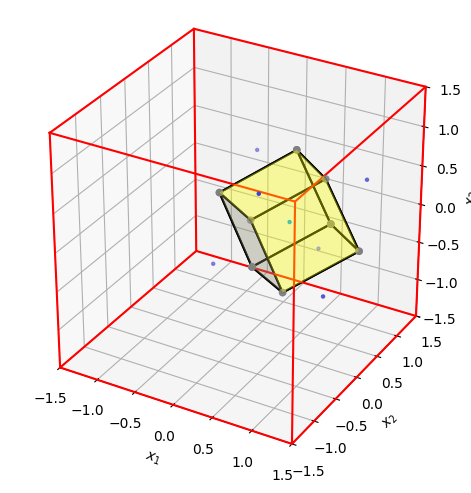

In [3]:
# %matplotlib widget
print(np.sum(ridge_based_para_sense_preparations(ridge_vertices, bandwidths, aabbox, step_size=None)[-2]))

label_c = colors[np.unique(labels, return_inverse=True)[1]]

ridge_line_color = "black"
ridge_point_color = "gray"

v_sample_point_x1_x2_x3 = 0.0
bwh_x1, bwh_x2, bwh_3 = bandwidths * 0.5

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=label_c, s=5)

averts = []

for i, rv in enumerate(ridge_vertices):
    ax.scatter(rv[:, 0], rv[:, 1], rv[:, 2], color=ridge_point_color)
    verts = list(list(zip(rv[:, 0], rv[:, 1], rv[:, 2])))
    averts.append(verts)
    rv_ = np.vstack([rv, rv[0:1]])
    ax.plot(rv_[:, 0], rv_[:, 1], rv_[:, 2], color=ridge_line_color)

face_colors = ["yellow"] * 6
face_colors[3] = "blue"

pc = Poly3DCollection(verts=averts, alpha=0.2, facecolors=face_colors)
ax.add_collection(pc)

ax.set_xlabel(dim_labels[0])
ax.set_ylabel(dim_labels[1])
ax.set_zlabel(dim_labels[2])

bbox_points_lower = np.array([
    aabbox[:, 0], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 0]]
])
bbox_points_upper = np.array([
    [aabbox[0, 0], aabbox[1, 0], aabbox[2, 1]], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 1]]
])

bboxp_lower = np.vstack([bbox_points_lower, bbox_points_lower[0]])
bboxp_upper = np.vstack([bbox_points_upper, bbox_points_upper[0]])

ax.plot(bboxp_lower[:, 0], bboxp_lower[:, 1], bboxp_lower[:, 2], c="red")
ax.plot(bboxp_upper[:, 0], bboxp_upper[:, 1], bboxp_upper[:, 2], c="red")
for i in range(len(bbox_points_lower)):
    ax.plot([bbox_points_lower[i][0], bbox_points_upper[i][0]], [bbox_points_lower[i][1], bbox_points_upper[i][1]], [bbox_points_lower[i][2], bbox_points_upper[i][2]], c="red")

# plot bandwidths

f = 0.0
offset = f * (aabbox[:, 1] - aabbox[:, 0])
offset = np.vstack([-offset, offset]).T
ax.set_xlim(aabbox[0] + offset[0])
ax.set_ylim(aabbox[1] + offset[1])
ax.set_zlim(aabbox[2] + offset[2])

ax.set_aspect("equal")
fig.tight_layout()
# plt.title(f'One ridge evaluated at x1=0.0 and x2=0.0 with bandwidth=0.1')
plt.show()
pass


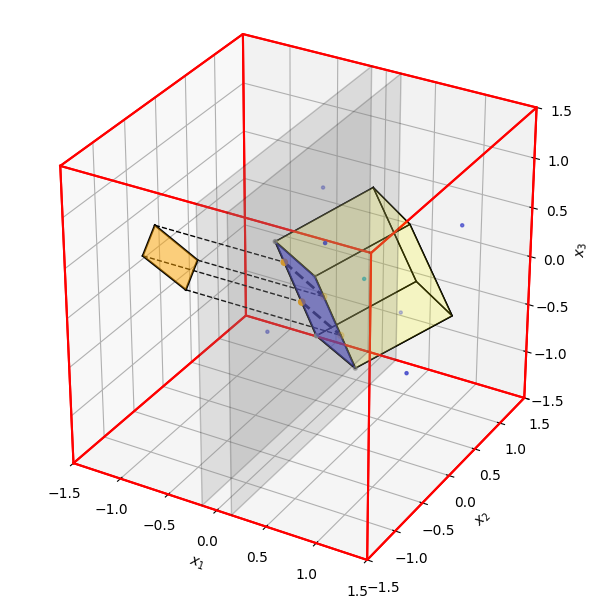

In [12]:
rv_idx = 3
ridge_vertices_ = ridge_vertices[rv_idx]

plt.close()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

averts = []
ax.scatter(ridge_vertices_[:, 0], ridge_vertices_[:, 1], ridge_vertices_[:, 2], s=2**3, color=ridge_point_color)
verts = list(list(zip(ridge_vertices_[:, 0], ridge_vertices_[:, 1], ridge_vertices_[:, 2])))
averts.append(verts)
rv2_ = np.vstack([ridge_vertices_, ridge_vertices_[0:1]])
ax.plot(rv2_[:, 0], rv2_[:, 1], rv2_[:, 2], color=ridge_line_color)

face_colors = ["yellow"] * 6
face_colors[3] = "blue"

pc = Poly3DCollection(verts=averts, alpha=0.5, facecolors=[face_colors[3]])
ax.add_collection(pc)

ax.set_xlabel(dim_labels[0])
ax.set_ylabel(dim_labels[1])
ax.set_zlabel(dim_labels[2])

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=label_c, s=5)

averts = []

for i, rv in enumerate(ridge_vertices):
    # ax.scatter(rv[:, 0], rv[:, 1], rv[:, 2], color=ridge_point_color)
    verts = list(list(zip(rv[:, 0], rv[:, 1], rv[:, 2])))
    averts.append(verts)
    rv_ = np.vstack([rv, rv[0:1]])
    ax.plot(rv_[:, 0], rv_[:, 1], rv_[:, 2], linewidth=1, color=ridge_line_color)

face_colors = ["yellow"] * 6
face_colors[3] = "blue"

pc = Poly3DCollection(verts=averts, alpha=0.1, facecolors=face_colors)
ax.add_collection(pc)

ax.set_xlabel(dim_labels[0])
ax.set_ylabel(dim_labels[1])
ax.set_zlabel(dim_labels[2])

bbox_points_lower = np.array([
    aabbox[:, 0], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 0]]
])
bbox_points_upper = np.array([
    [aabbox[0, 0], aabbox[1, 0], aabbox[2, 1]], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 1]]
])

bboxp_lower = np.vstack([bbox_points_lower, bbox_points_lower[0]])
bboxp_upper = np.vstack([bbox_points_upper, bbox_points_upper[0]])

ax.plot(bboxp_lower[:, 0], bboxp_lower[:, 1], bboxp_lower[:, 2], c="red")
ax.plot(bboxp_upper[:, 0], bboxp_upper[:, 1], bboxp_upper[:, 2], c="red")
for i in range(len(bbox_points_lower)):
    ax.plot([bbox_points_lower[i][0], bbox_points_upper[i][0]], [bbox_points_lower[i][1], bbox_points_upper[i][1]], [bbox_points_lower[i][2], bbox_points_upper[i][2]], c="red")


bbox_points_lower = np.array([
    aabbox[:, 0], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 0]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 0]]
])
bbox_points_upper = np.array([
    [aabbox[0, 0], aabbox[1, 0], aabbox[2, 1]], [aabbox[0, 0], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 1], aabbox[2, 1]], [aabbox[0, 1], aabbox[1, 0], aabbox[2, 1]]
])

bboxp_lower = np.vstack([bbox_points_lower, bbox_points_lower[0]])
bboxp_upper = np.vstack([bbox_points_upper, bbox_points_upper[0]])

ax.plot(bboxp_lower[:, 0], bboxp_lower[:, 1], bboxp_lower[:, 2], c="red")
ax.plot(bboxp_upper[:, 0], bboxp_upper[:, 1], bboxp_upper[:, 2], c="red")
for i in range(len(bbox_points_lower)):
    ax.plot([bbox_points_lower[i][0], bbox_points_upper[i][0]], [bbox_points_lower[i][1], bbox_points_upper[i][1]], [bbox_points_lower[i][2], bbox_points_upper[i][2]], c="red")


# eval points
ev_x1 = 0.0
lhs_x1 = ev_x1 - bwh_x1
uhs_x1 = ev_x1 + bwh_x1
lhs_poly_verts = np.array([
    [lhs_x1, aabbox[1, 0], aabbox[2, 0]],
    [lhs_x1, aabbox[1, 1], aabbox[2, 0]],
    [lhs_x1, aabbox[1, 1], aabbox[2, 1]],
    [lhs_x1, aabbox[1, 0], aabbox[2, 1]],
])

uhs_poly_verts = lhs_poly_verts.copy()
uhs_poly_verts[:, 0] = uhs_x1

ax.add_collection(Poly3DCollection(verts=[lhs_poly_verts, uhs_poly_verts], alpha=0.2, edgecolor="black", facecolors=["gray"] * 2))

_, _, Vh = rotate_to_lower_dimensional_hyperplane(ridge_vertices_, return_full=True)
normal_of_plane = Vh[-1, :]
offset_of_plane = (normal_of_plane @ ridge_vertices_[0])
R = Vh.T

rv_2d = ridge_vertices_ @ R
rv_d = rv_2d[0, -1]
rv_2d_ = rv_2d[:, :-1]

ch_2d = ConvexHull(rv_2d_)

hs_lower, hs_upper = make_halfspaces(lhs_x1, uhs_x1, 3, 0)
hs_l2 = hs_lower[:-1] @ R
hs_u2 = hs_upper[:-1] @ R

hs_lower_norm_2d = normalize_vec(hs_l2[:-1])
hs_upper_norm_2d = normalize_vec(hs_u2[:-1])

# compute intersecting points on the normals
p1, p2 = find_point_in_intersecting_plane(np.append(normal_of_plane, offset_of_plane), 0, lhs_x1)[0], find_point_in_intersecting_plane(np.append(normal_of_plane, offset_of_plane), 0, uhs_x1)[0]

# project intersecting points on 2d
l12_points = np.vstack([p1, p2])
l12_points_rotated = l12_points @ R
l12_points_2d = l12_points_rotated[:, :-1]

# compute offset of projected halfintersections
ol2d, ou2d = get_plane_offset_from_normal_and_point_in_plane(hs_lower_norm_2d, l12_points_2d[0]), get_plane_offset_from_normal_and_point_in_plane(hs_upper_norm_2d, l12_points_2d[1])

equations = ch_2d.equations
equations = np.vstack([equations, np.append(hs_lower_norm_2d, -ol2d), np.append(hs_upper_norm_2d, -ou2d)])

# get interior point
interior_point_2d = get_interior_point_from_halfspaces(equations)[0]

# compute halfspace intersections
hs_2d = HalfspaceIntersection(halfspaces=equations, interior_point=interior_point_2d)
intersection_points_2d = hs_2d.intersections
intersection_points_3d = np.column_stack([intersection_points_2d, np.ones(len(intersection_points_2d)) * rv_d]) @ R.T

l1_ip3d = intersection_points_3d[[0, 2]]
u1_ip3d = intersection_points_3d[[1, 3]]

ax.scatter(l1_ip3d[:, 0], l1_ip3d[:, 1], l1_ip3d[:, 2], c="orange")
ax.plot(l1_ip3d[:, 0], l1_ip3d[:, 1], l1_ip3d[:, 2], linewidth=2, linestyle="--", c="black")

ax.plot(u1_ip3d[:, 0], u1_ip3d[:, 1], u1_ip3d[:, 2], linewidth=2, linestyle="--", c="black")
ax.scatter(u1_ip3d[:, 0], u1_ip3d[:, 1], u1_ip3d[:, 2], c="orange")

# straight lines down to aabbox min
intersection_points_2d_proj = intersection_points_3d[:, 1:]

intersection_points_2d_proj_in_3d = np.column_stack([[aabbox[0, 0]] * 4, intersection_points_2d_proj])

for i in range(len(intersection_points_3d)):
    pp_ = np.stack([intersection_points_2d_proj_in_3d[i], intersection_points_3d[i]])
    ax.plot(pp_[:, 0], pp_[:, 1], pp_[:, 2], linewidth=1, linestyle="--", c="black")

intersection_points_2d_proj_in_3d_ = np.vstack([intersection_points_2d_proj_in_3d, intersection_points_2d_proj_in_3d[:1]])[[0, 2, 3, 1, 4]]
for i in range(len(intersection_points_2d_proj_in_3d)):
    pp_ = intersection_points_2d_proj_in_3d_[i:i+2]
    ax.plot(pp_[:, 0], pp_[:, 1], pp_[:, 2], c="black")
    
ch22 = ConvexHull(intersection_points_2d_proj)

ax.add_collection(Poly3DCollection(verts=[intersection_points_2d_proj_in_3d_[:-1]], alpha=0.5, facecolors=["orange"] * 2))

f = 0.0
offset = f * (aabbox[:, 1] - aabbox[:, 0])
offset = np.vstack([-offset, offset]).T
ax.set_xlim(aabbox[0] + offset[0])
ax.set_ylim(aabbox[1] + offset[1])
ax.set_zlim(aabbox[2] + offset[2])

ax.set_aspect("equal")
fig.tight_layout()
# plt.title(f'One ridge evaluated at x1=0.0 and x2=0.0 with bandwidth=0.1')
plt.show()

In [13]:
fig.savefig("three_dim_example.pdf")

In [6]:
preps = ridge_based_para_sense_preparations(make_object_array([ridge_vertices_]), bandwidths, aabbox)

In [7]:
preps[0][0][preps[3][0].flat]

array([-0.45, -0.15,  0.15,  0.45])

In [8]:
sample_points, sample_points_min, sample_points_max, okays, Vhs, normals, offsets, d_s, lower_dim_convex_hull_equations, volumes, selector = preps